# <span style="color:royalblue"> [3주차] API 쉽게 배우기</span> <img src="./data/logo.png" style="width: 120px;" align="right">
# FRED(미국 연방 준비 은행 세인트루이스) 경제 데이터 활용

--- 

<div style="text-align: right"> Final Edition : 2022.11.1<br>
    copyrightⓒ 2022 All rights reserved by Data Lover Pablo </div>

# 1. API를 활용한 데이터 수집 및 분석

## 1.1 API란?
* 어플리케이션 프로그래밍 인터페이스(Application Programming Interface)
* 어플리케이션 소프트웨어를 구축하고 통합하기 위한 정의 및 프로토콜 세트
* 당사자 간의 규약. 한쪽 당사자가 특정방식으로 원격요청을 보내면 다른 당사자가 지정된 양식으로 응답하는 행위  

![API개념도](./data/API.png)

## 1.2  FRED 경제데이터 API
fredapi : Python API for FRED (Federal Reserve Economic Data)  
[fredapi 활용방법 깃허브 GitHub](https://github.com/mortada/fredapi)

## 1.3 API KEY 받는 방법 
[FRED Request or view your API keys](https://research.stlouisfed.org/docs/api/api_key.html)  
아래 블로그를 참고하여 멘티 분들은 직접 받아보시기 바랍니다. [참고블로그](https://junyoru.tistory.com/122)

(멘토) API 키 : a4254d2d38b4e952d58267cb055e833e

## 1.4 API 파이썬 패키지 설치

In [1]:
!pip install fredapi

## 1.5 fredapi 패키지와 Fred 모듈 불러오기
여기까지 완료되면 모든 준비가 끝났습니다.

In [1]:
from fredapi import Fred

# 할당받은 api key를 아래 따옴표 안에 넣으세요
# fred = Fred(api_key='a4254d2d38b4e952d58267cb055e833e')
# 새로 받은 키
fred = Fred(api_key='0605fecf6dcbc696edc2d56743292db0')

### 1.5.1 데이터 불러오기
Ticker는 각 데이터명의 오른쪽에 있는 영문과 숫자조합 코드입니다.
https://fred.stlouisfed.org/series/WM2NS

## [참고] S&P500 지수
* 미국의 신용평가회사 스탠더드 앤드 푸어스(Standard & Poor's)에서 개발한 미국의 주가지수.
* S&P 500은 500개 대형기업의 주식을 포함한 지수(Standard & Poor's 500 Stock Index)
* 미국 3대 주가지수 : 다우존스(애플, 나이키 등 블루칩인 30개 종목), 나스닥(NASDAQCOM, 우리가 흔히 말하는 나스닥은 나스닥100), S&P500 

In [2]:
data = fred.get_series('SP500') # SP500 : S&P500지수 WM2NS INTDSRUSM193N

In [3]:
data.head(5)

2012-11-01    1427.59
2012-11-02    1414.20
2012-11-05    1417.26
2012-11-06    1428.39
2012-11-07    1394.53
dtype: float64

In [4]:
data.tail(10)

2022-10-18    3719.98
2022-10-19    3695.16
2022-10-20    3665.78
2022-10-21    3752.75
2022-10-24    3797.34
2022-10-25    3859.11
2022-10-26    3830.60
2022-10-27    3807.30
2022-10-28    3901.06
2022-10-31    3871.98
dtype: float64

## 1.6 S&P500 지수 시각화
API를 이용해서 s&p500 지수를 가져오고 가져온 데이터를 시계열 그래프로 표현

<AxesSubplot:>

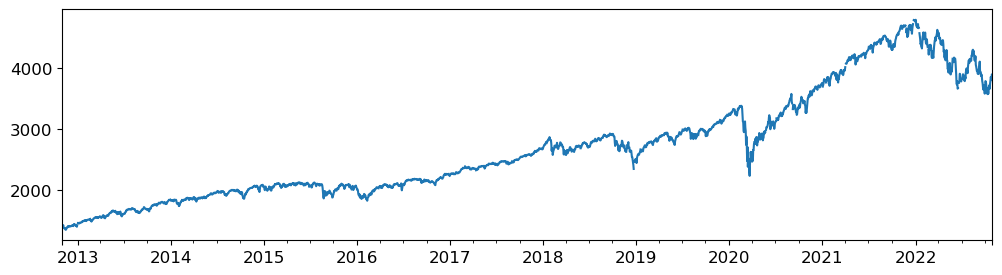

In [5]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

data.plot()

## 1.7 미국 기준금리

# 연습문제(Exercise) 1 - Just Do It Now !

API를 이용해서 기준금리를 가져오고 가져온 데이터를 시계열 그래프로 표현해보세요

In [7]:
# 변수명 = 모듈.함수('티커') # SP500 : S&P500지수  
Interest_Rates = fred.get_series('INTDSRUSM193N')

In [8]:
# 데이터가 잘 들어왔는지 확인
Interest_Rates

1948-01-01     NaN
1948-02-01     NaN
1948-03-01     NaN
1948-04-01     NaN
1948-05-01     NaN
              ... 
2021-04-01    0.25
2021-05-01    0.25
2021-06-01    0.25
2021-07-01    0.25
2021-08-01    0.25
Length: 884, dtype: float64

#### 그래프로 현상을 파악하라 (위)


<AxesSubplot:>

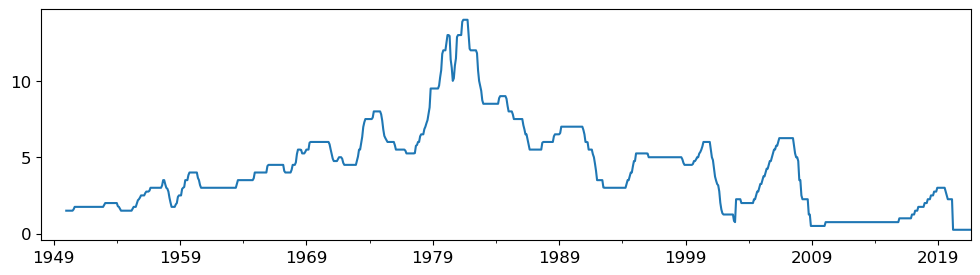

In [9]:
# 모듈 불러오기
import matplotlib.pyplot as plt

# 스타일, 캔버스, 폰트 설정은 위와 동일
plt.style.use('default')

# 그래프 시각화 

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 12

Interest_Rates.plot()

In [9]:
# 그리고 데이터가 나타내는 현상에 대해 설명해보세요

## 1.8 미국금리와 S&P500 지수 시각화

금리와 주가를 한 그래프에 나타내는 경우, y축 값에 따라 한쪽 축값에 따라 매몰되게 됩니다. <br>
따라서 y축을 왼쪽과 오른쪽에 각각 나타내서 확인합니다.

<AxesSubplot:>

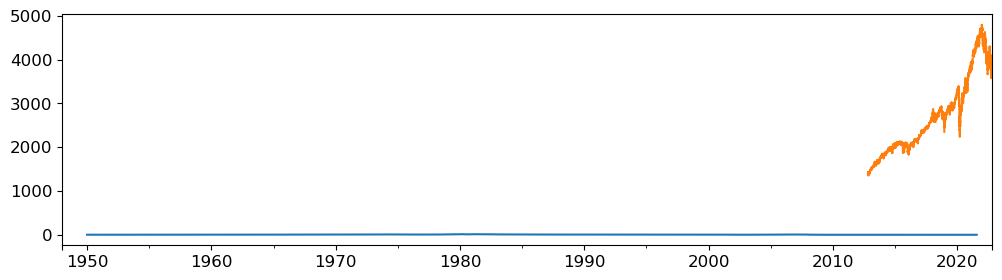

In [12]:
Interest_Rates.plot()
data.plot()

# 2. finance-datareader

## 2.1  finance-datareader 패키지 설치

In [13]:
!pip install finance-datareader

In [15]:
!python -m pip install --upgrade pip

### [참고] 플롯 설정입니다.  
plt.rcParams["axes.grid"] = True # 회색 그리드(바둑판) 설정  
plt.rcParams['axes.unicode_minus'] = False # 한글 마이너스 폰트 깨질 경우 

In [38]:
import FinanceDataReader as fdr

IR_SP = fdr.DataReader(['INTDSRUSM193N', 'SP500'], start = '2012', data_source='fred')

'data_source' argument deprecated, use in symbol like these:
  fdr.DataReader('FRED:DEXKOUS', '1990-01-01')
  fdr.DataReader('FRED:DEXKOUS')
  fdr.DataReader('FRED:NASDAQCOM,M2,HSN1F')



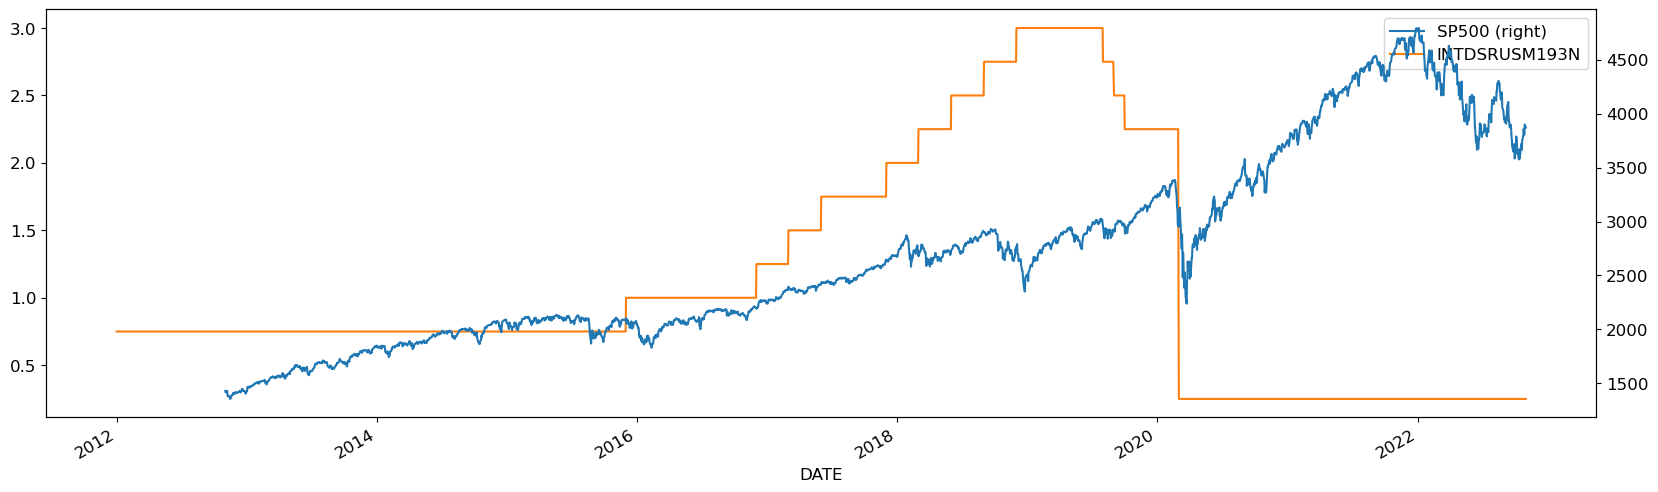

In [40]:
# 기준금리와 주가를 한 그래프에서 확인
import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

# IR_SP = fdr.DataReader(['INTDSRUSM193N', 'SP500'], start = '2012', data_source='fred')
# graph = IR_SP.plot(secondary_y = 'SP500')
IR_SP = fdr.DataReader('FRED:INTDSRUSM193N,SP500','2012')
graph = IR_SP.plot(secondary_y = 'SP500')

In [41]:
IR_SP

,SP500,INTDSRUSM193N
DATE,,
2012-01-01,NaN,0.75
2012-02-01,NaN,0.75
2012-03-01,NaN,0.75
2012-04-01,NaN,0.75
2012-05-01,NaN,0.75
...,...,...
2022-10-25,3859.11,0.25
2022-10-26,3830.60,0.25
2022-10-27,3807.30,0.25


# 연습문제(Exercise) 2 - Just Do It Now !

기준금리와 통화량을 한 그래프에서 확인해보세요

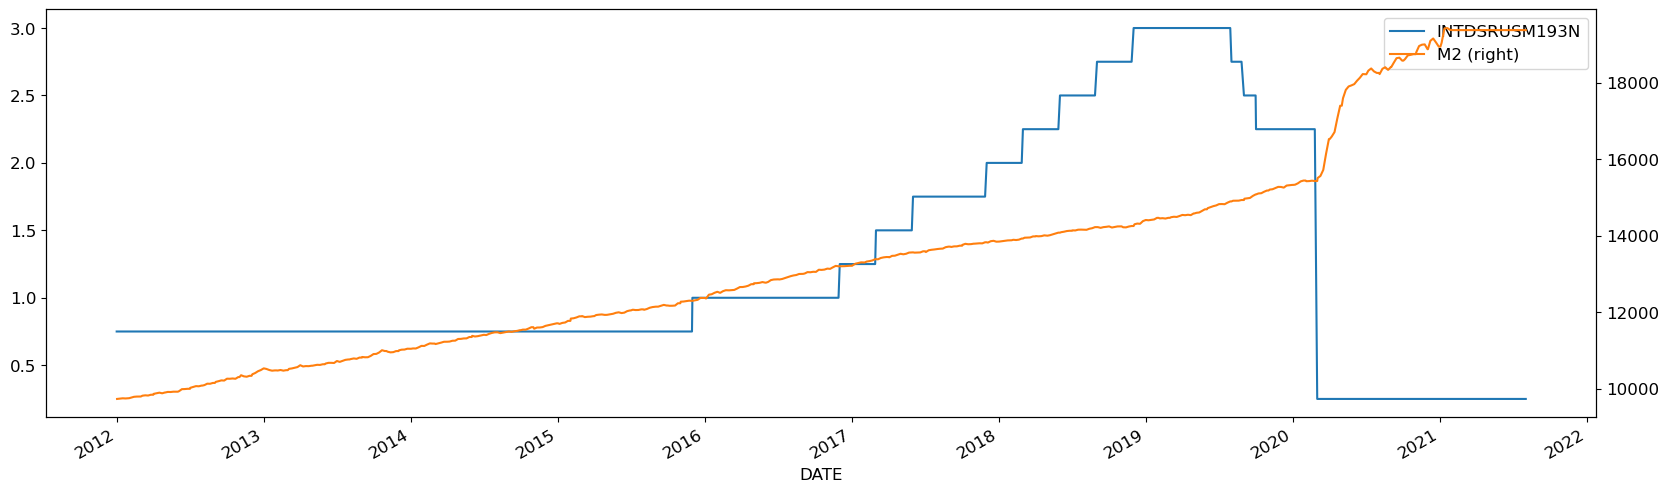

In [42]:
# 기준금리와 주가를 한 그래프에서 확인
import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

# IR_SP = fdr.DataReader(['INTDSRUSM193N', 'SP500'], start = '2012', data_source='fred')
# graph = IR_SP.plot(secondary_y = 'SP500')
IR_SP = fdr.DataReader('FRED:INTDSRUSM193N,M2','2012')
graph = IR_SP.plot(secondary_y = 'M2')

<AxesSubplot:xlabel='DATE'>

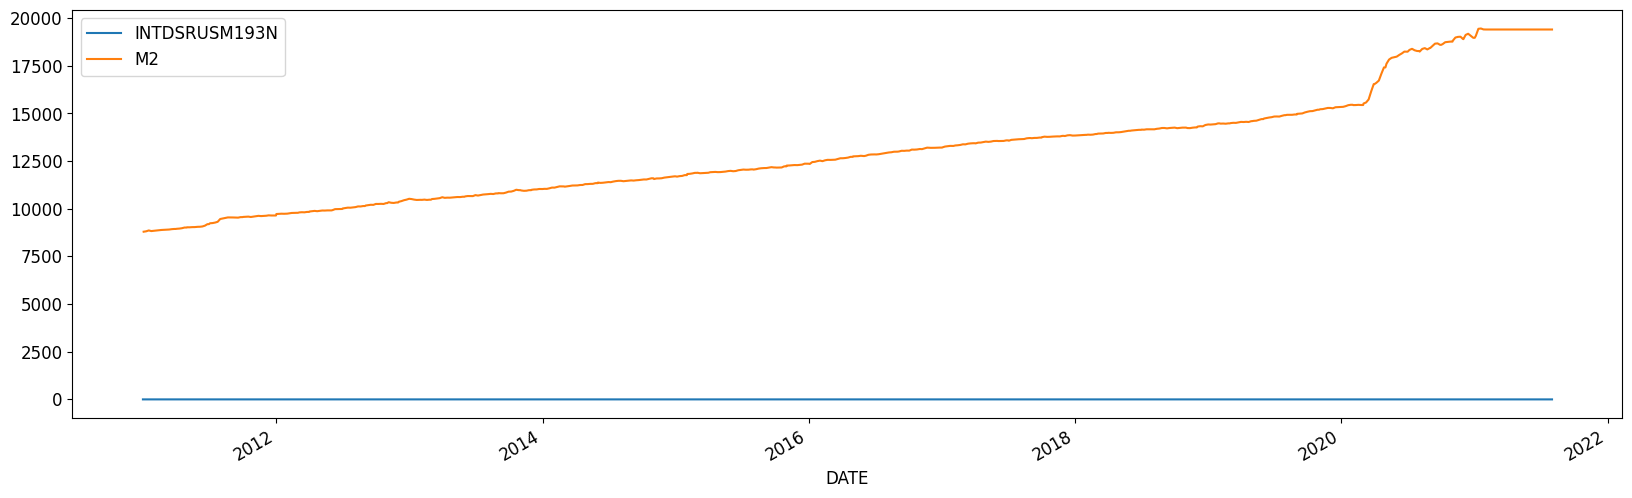

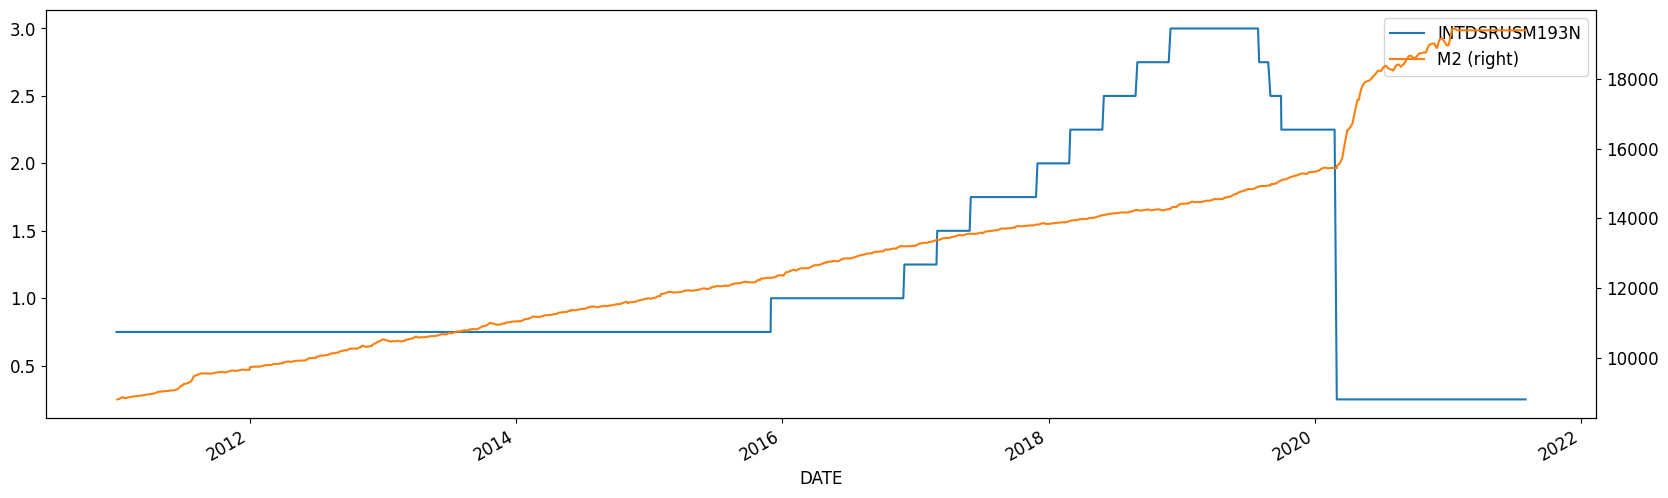

In [14]:
# 기준금리와 통화량을 한 그래프에서 확인
# 처음부터 연습해봅니다.

# 1. 패키지 모듈 불러오기 


# 2. 파라미터 설정


# 3. API 모듈 사용 데이터 불러오기 ([데이터], 기간, 소스)


# 4. 그래프 시각화 .plot() 




In [15]:
# 그리고 데이터가 나타내는 현상에 대해 설명해보세요

### 산업생산지수(IPMAN)  

산업생산지수란 한 나라의 공장에서 각종 물건이 과거에 비해 얼마나 많이 생산되고 있는지 조사를 한 것  

* 산업생산지수가 증가 : 공장에서 각종 물건이 과거에 비해 더 많이 생산되고 있다.
* 산업생산지수가 감소 : 공장이 과거에 비해 잘 돌아가지 않고 있다.

* 산업생산지수 종류 : 광공업 생산지수, 제조업 생산지수, 서비스업 생산지수

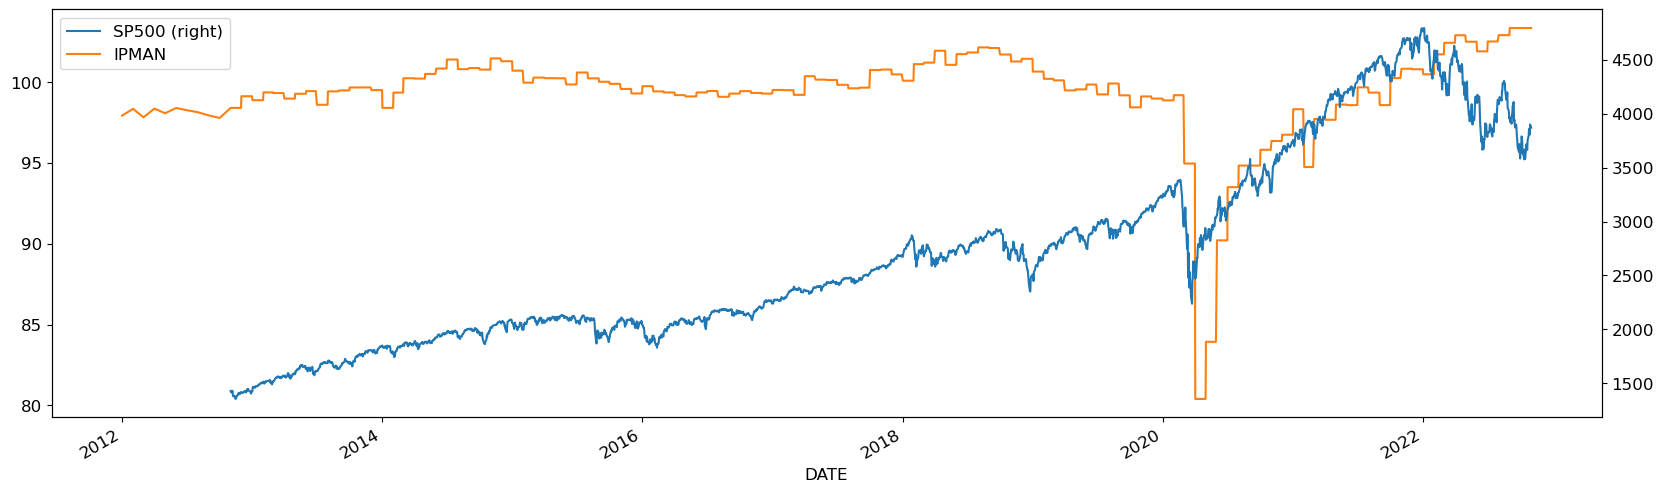

In [43]:
# 산업생산지수와 주가를 한 그래프에서 확인
# IPI(산업생산지수)는 미국 연방준비제도이사회에서 발표한 제조업, 광업, 유틸리티의 실질 생산량을 측정하는 경제 지표

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

# IR_SP = fdr.DataReader(['IPMAN', 'SP500'], start = '2012', data_source='fred')
IR_SP = fdr.DataReader('FRED:IPMAN,SP500','2012')
graph = IR_SP.plot(secondary_y = 'SP500')

### PMI 지수(Purchasing Management Index)
제조업 구매 관리 지수  
PMI는 신규수주 30%, 생산 25%, 고용 20%, 공급자 운송시간 15%, 재고 10% 5개 지표의 가중치를 통해 산출하는 종합지수

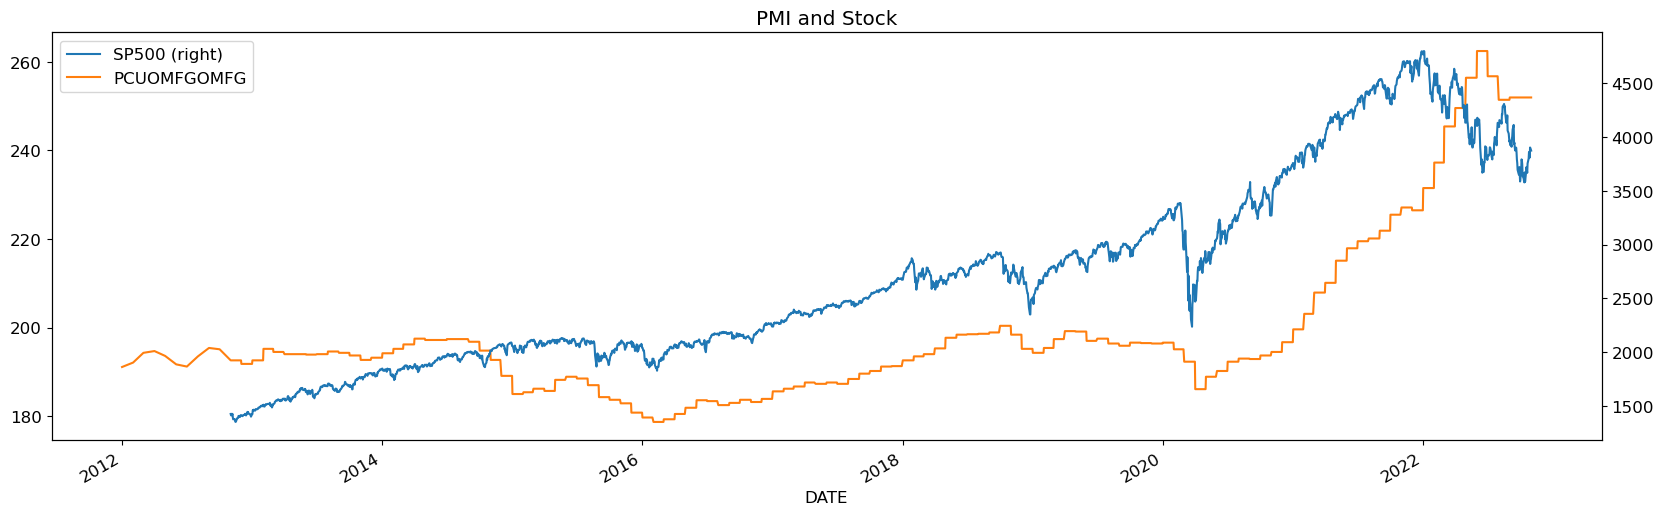

In [45]:
# 제조업 구매관리 지수와 주가를 한 그래프에서 확인

import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)

# PMI = fdr.DataReader(['PCUOMFGOMFG', 'SP500'], start = '2012', data_source='fred')
PMI = fdr.DataReader('FRED:PCUOMFGOMFG,SP500','2012')
gg = PMI.plot(secondary_y = 'SP500', title = "PMI and Stock")

## 2.2 미국 장단기 금리차이

[경제상식] 돈은 수익률이 높은 곳으로 흐릅니다.<br>
  
미국 금리와 경제상황에 대한 지표로 10년물 미국채권 금리와 2년물의 차이를 가장 많이 봅니다.<br>
일반적으로 10년 짜리 채권금리(장기국채) > 2년 짜리 채권금리(단기국채)<br>
(돈을 장기로 빌려주는 것이 리스크가 더 크므로 이자를 많이 받습니다)

* 장단기 금리 차이 = 10년물 국채금리 -  2년물 국채금리<br>

만약 반대적으로 <br>
10년물 금리(수익률) < 2년물 이 되는 것을 장단기 금리 역전현상이라고 합니다.<br>

![R의공포](./data/R.jpg)

경기의 불황을 예상 → 시장참여자들이 금리가 내릴것으로 기대 → 이자가 떨어진다고 하면 장기채권(예. 이미 확보된 5% 마진)을 사놓는 것이 유리. → 장기채권에 돈이 몰림 → 장기채권 가격상승 → 장기채권 발행자는 금리를 낮춤.

R의 공포(Recession) 경기침체의 신호로 봅니다.
(참고자료)[경제 유튜버 홍춘옥님](https://www.youtube.com/watch?v=5sbZRGHnaRA)

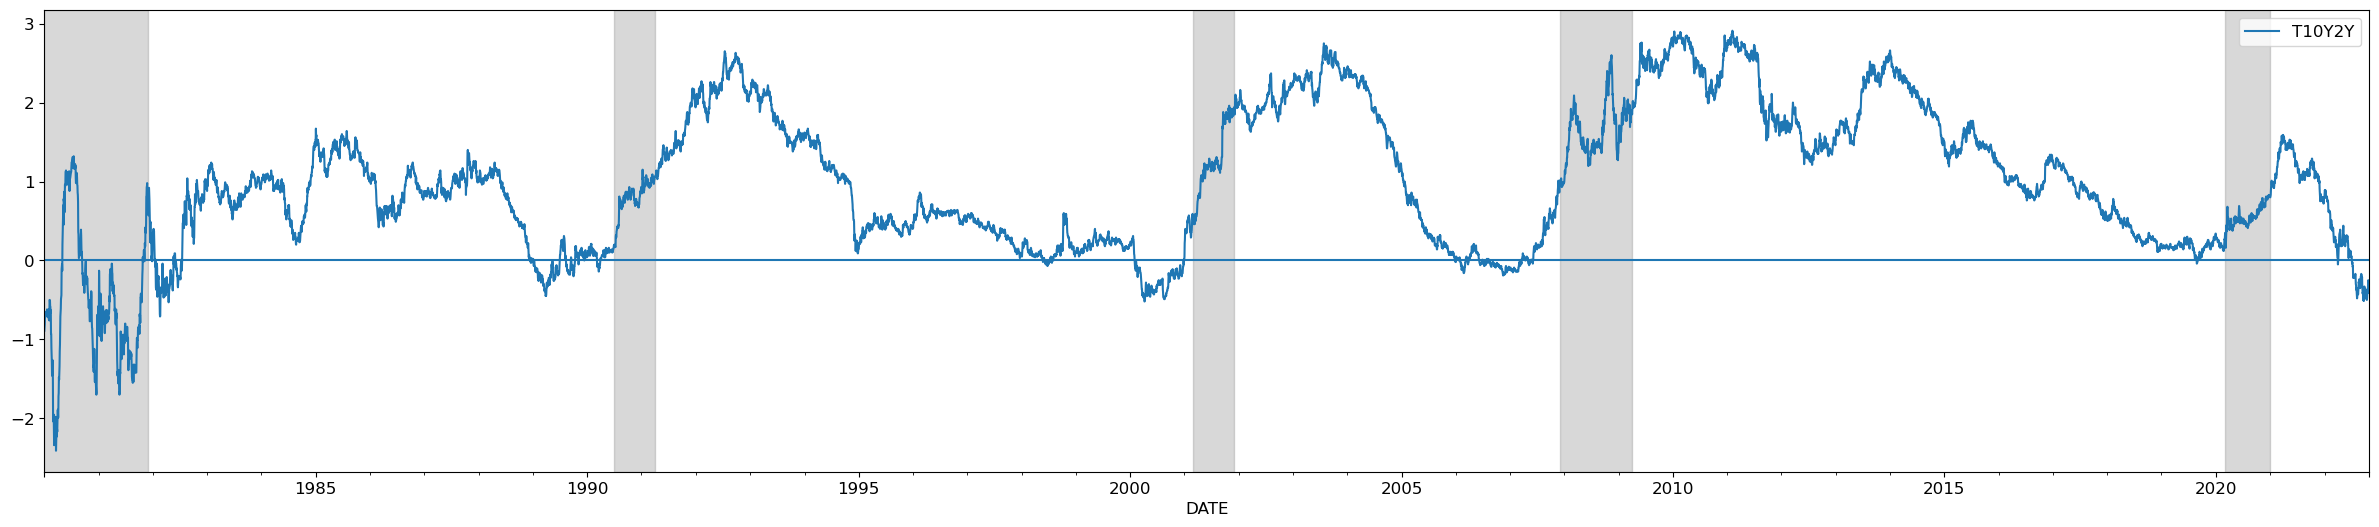

In [46]:
import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (30,6)
# Interest_rate_diff =fdr.DataReader('T10Y2Y', data_source='fred')
Interest_rate_diff =fdr.DataReader('FRED:T10Y2Y')
graph = Interest_rate_diff.plot()

# 두 그래프의 차이가 0보다 작은 구간이 발생한 이후, 실제 경기침체(회색음영)이 발생했음을 알 수 있습니다.
graph.axhline(y=0) #xmin=0.1, xmax=0.9)

graph.axvspan('1980-01-01', '1981-12-01',color='gray', alpha=0.3)
graph.axvspan('1990-07-01', '1991-04-01',color='gray', alpha=0.3)
graph.axvspan('2001-03-01', '2001-12-01',color='gray', alpha=0.3)
graph.axvspan('2007-12-01', '2009-03-30',color='gray', alpha=0.3)
graph.axvspan('2020-03-01', '2020-12-30',color='gray', alpha=0.3)

## 2.3 M2 통화량

* M0 통화량(본원통화) : 한국은행에서 시중은행으로 들어가는 실제 돈(이 돈이 대출을 통해 통화가 팽창)
* M1 통화량(협의통화) : 우리가 당장 은행에 가서 현금으로 찾을 수 있는 유동성이 높은 통화의 양 ( = 요구불 예금 + 수시 입출금식 예금 )
* M2 통화량(광의통화) : 시중 유동성을 참고하는 지표, 경제관련 기사에서 등장하는 통화량으로 경제성장률, 물가, 금리를 감안하여 조절                        M1통화량에 추가로 2년 미만 정기예적금 + 시장형 금융상품(펀트) + 금융채권 + 양도성예금증서(CD) 를 포함

In [19]:
# import ssl
# context = ssl._create_unverified_context()

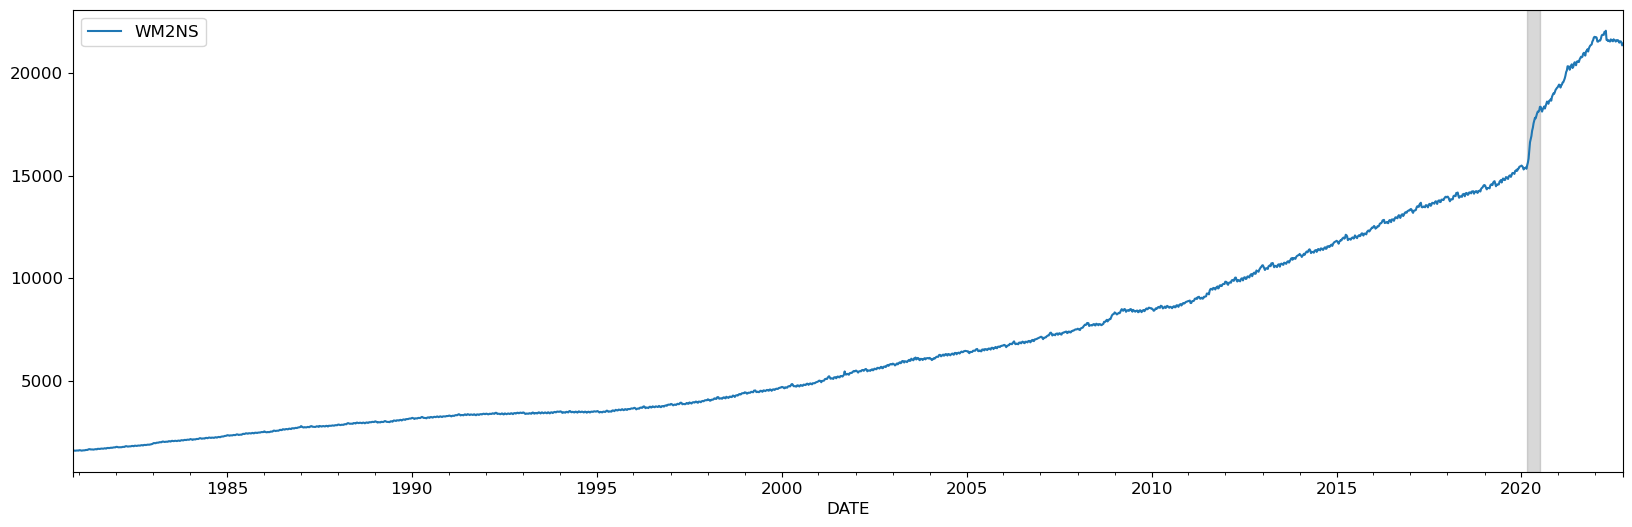

In [47]:
# COVID19로 인한 M2 통화량 증가
import FinanceDataReader as fdr
import matplotlib as plt

plt.rcParams["figure.figsize"] = (20,6)
# M2 =fdr.DataReader('WM2NS', data_source='fred')
M2 =fdr.DataReader('FRED:WM2NS')
graph = M2.plot()

graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

In [48]:
M2

,WM2NS
DATE,
1980-11-03,1595.2
1980-11-10,1601.2
1980-11-17,1602.9
1980-11-24,1594.8
1980-12-01,1599.8
...,...
2022-09-05,21532.0
2022-09-12,21534.8
2022-09-19,21481.8


## 2.4 NASDAQ 지수

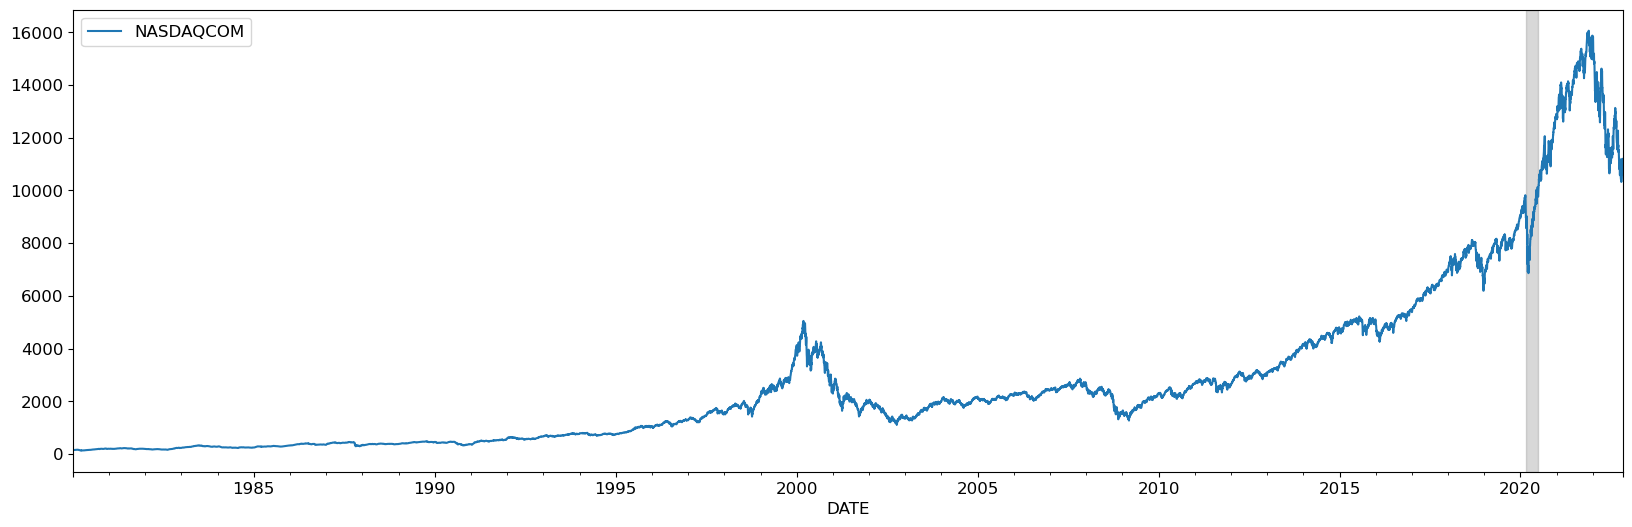

In [49]:
plt.rcParams["figure.figsize"] = (20,6)

# NAS =fdr.DataReader('NASDAQCOM', data_source='fred')
NAS =fdr.DataReader('FRED:NASDAQCOM')
graph = NAS.plot()
graph.axvspan('2020-03-01', '2020-06-30',color='gray', alpha=0.3) # 코로나 COVID-19

## 2.5 M2 통화량과 나스닥

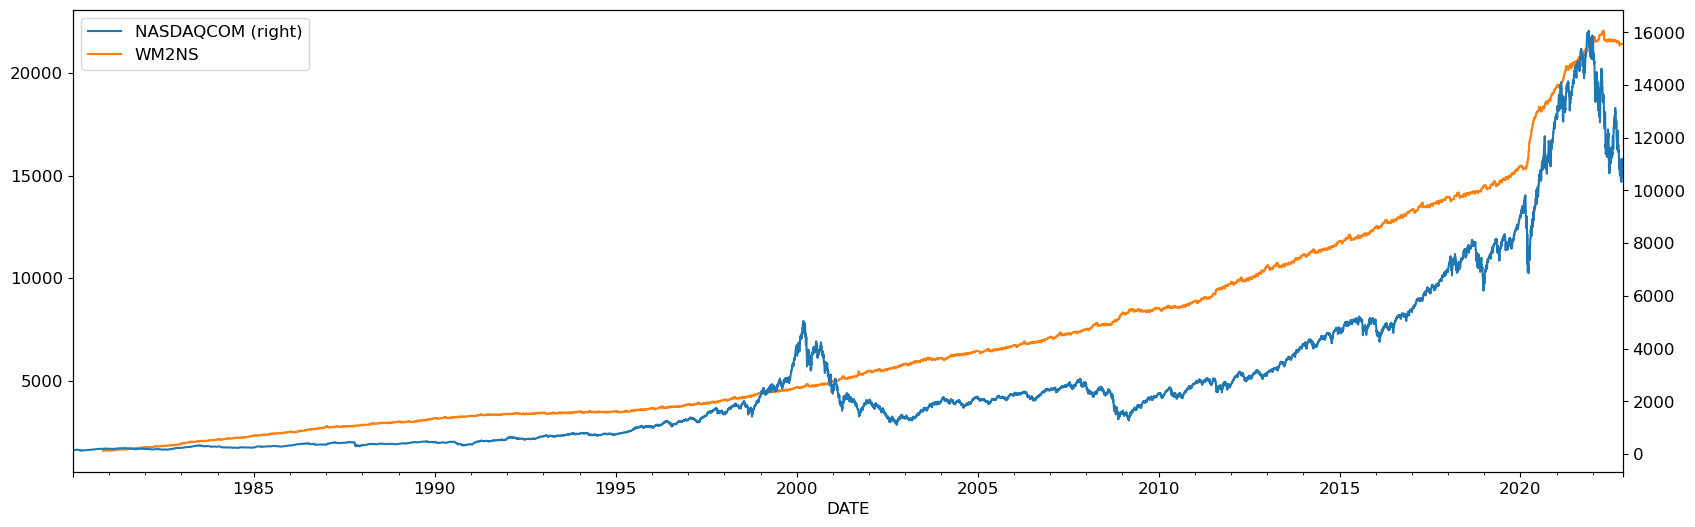

In [50]:
plt.rcParams["figure.figsize"] = (20,6)
# M2 = fdr.DataReader(['NASDAQCOM', 'WM2NS'], start = '2011', data_source='fred')
M2 = fdr.DataReader('FRED:NASDAQCOM,WM2NS')
graph = M2.plot(secondary_y = 'NASDAQCOM')

### 2.5.1 M2 통화량과 나스탁의 상관관계

In [51]:
import numpy as np

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

M2.corr(method=histogram_intersection)

,NASDAQCOM,WM2NS
NASDAQCOM,1.0,30831603.3
WM2NS,30831603.3,1.0


In [52]:
M2.corrwith

<bound method DataFrame.corrwith of             NASDAQCOM    WM2NS
DATE                          
1980-01-02     148.17      NaN
1980-01-03     145.97      NaN
1980-01-04     148.02      NaN
1980-01-07     148.62      NaN
1980-01-08     150.68      NaN
...               ...      ...
2022-10-25   11199.12  21409.7
2022-10-26   10970.99  21409.7
2022-10-27   10792.67  21409.7
2022-10-28   11102.45  21409.7
2022-10-31   10988.15  21409.7

[11174 rows x 2 columns]>

In [53]:
M2.corr(method='pearson', min_periods=1)

,NASDAQCOM,WM2NS
NASDAQCOM,1.000000,0.946109
WM2NS,0.946109,1.000000


# [참고] 화폐수량이론

'가격이 화폐량에 의해 결정이 된다'는 이론에 따른 수량 방정식(Quantity theory of money, QTM) <br>
<br>

<span style="color:blue; font-weight:bold; font-size:20pt">

\begin{equation}
    {\displaystyle M\cdot {\bar {V}}= P \cdot {\bar {Y}}}
\end{equation}

</span>  
<br>
(1) M은 통화량, V는 화폐유통속도, P는 가격 수준, Y는 생산량이다.

- V, Y 는 상수

# 3. 주택가격지수와 각 경제지표와의 상관관계

## 3.1 케이스-쉴러 지수와 M2 통화량

,CSUSHPISA,WM2NS
CSUSHPISA,1.000000,0.971976
WM2NS,0.971976,1.000000


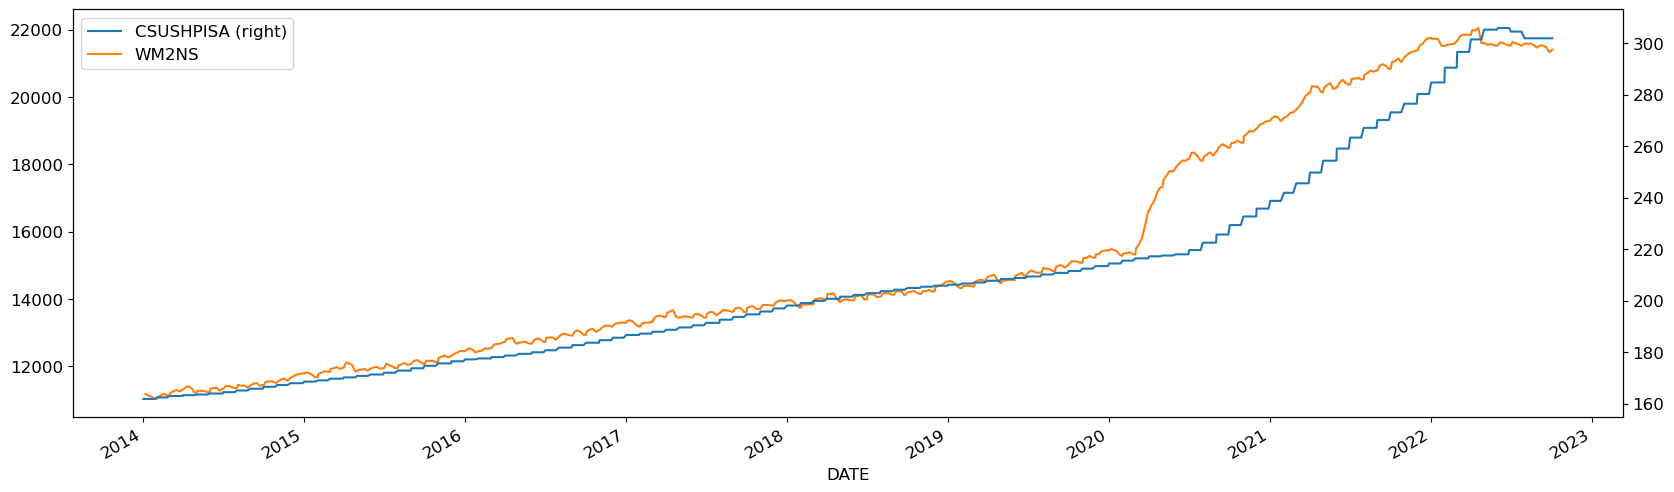

In [54]:
plt.rcParams["figure.figsize"] = (20,6)

# CS_M2 = fdr.DataReader(['CSUSHPISA', 'WM2NS'], start = '2014', data_source='fred')
# CS_M2 = fdr.DataReader(['CSUSHPISA', 'WM2NS'], start = '2014', data_source='fred')

CS_M2 = fdr.DataReader('FRED:CSUSHPISA,WM2NS','2014')
graph = CS_M2.plot(secondary_y = 'CSUSHPISA')
CS_M2.corr(method='pearson', min_periods=1)

## 3.2 케이스-쉴러 지수 + US House Price Index + M2 통화량 

In [55]:
# M2 통화량과, 나스닥, 주택가격지수

# US_CS_M2 = fdr.DataReader(['CSUSHPISA', 'WM2NS', 'USSTHPI'], start = '2014', data_source='fred')
US_CS_M2 = fdr.DataReader('FRED:CSUSHPISA,WM2NS,USSTHPI','2014')
print(US_CS_M2)

US_CS_M2.corr(method='pearson', min_periods=1)

            CSUSHPISA  USSTHPI    WM2NS
DATE                                   
2014-01-01    161.944   331.70      NaN
2014-01-06    161.944   331.70  11179.0
2014-01-13    161.944   331.70  11131.1
2014-01-20    161.944   331.70  11100.9
2014-01-27    161.944   331.70  11033.2
...               ...      ...      ...
2022-09-05    301.929   617.89  21532.0
2022-09-12    301.929   617.89  21534.8
2022-09-19    301.929   617.89  21481.8
2022-09-26    301.929   617.89  21338.0
2022-10-03    301.929   617.89  21409.7

[546 rows x 3 columns]


,CSUSHPISA,USSTHPI,WM2NS
CSUSHPISA,1.000000,0.997213,0.971976
USSTHPI,0.997213,1.000000,0.966626
WM2NS,0.971976,0.966626,1.000000


## 3.3 케이스-쉴러 지수(CSUSHPISA)와 주간 실업수당 청구 건수(ICSA)

요즘 미국 경기를 이야기 할 때 뉴스에 가장 많이 등장하는 지표중의 하나가 바로 주단위 신규 실업수당청구 건수 입니다.<br>
경기가 나빠지는 경우는 후행지표로 동작하지만, 경기가 좋아지는 경우 선행 지표로 활용할 수 있습니다.<br>
2008년 금융위기 때는 약간 후행하는 모습을 보이고 있습니다.

[참고] 연속 실업수당청구 건수 Continued Claims (Insured Unemployment)<br>
[CCSA](https://fred.stlouisfed.org/series/CCSA)

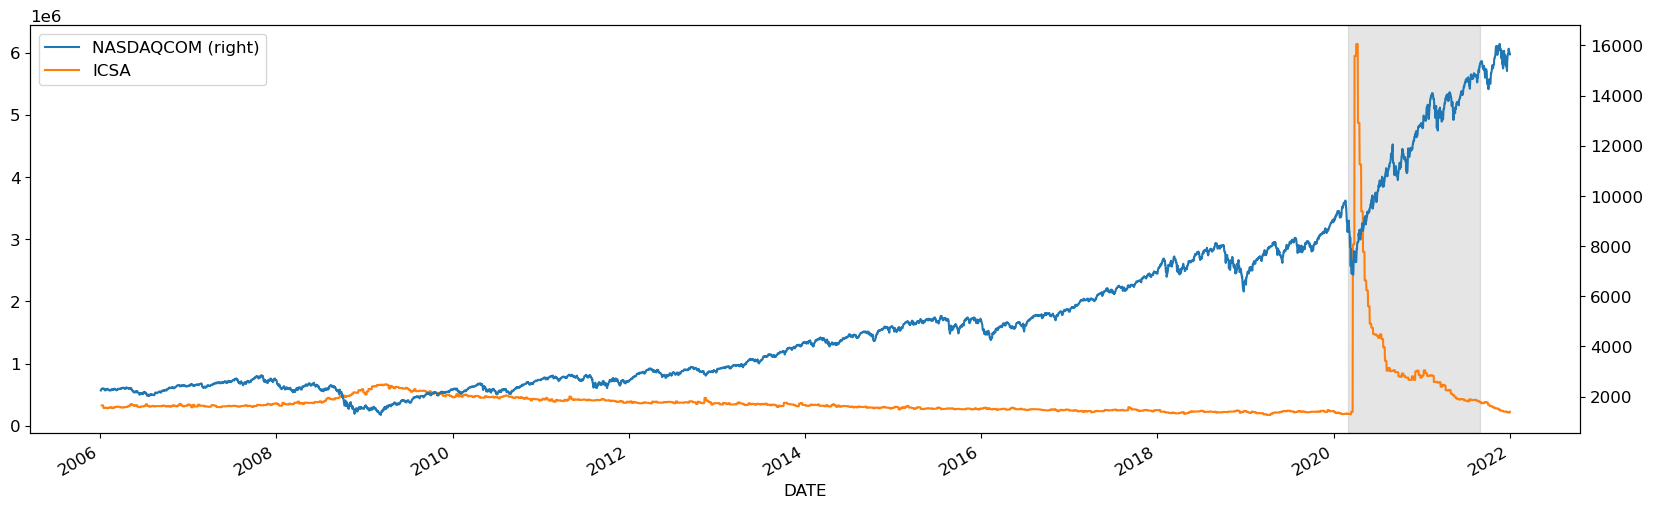

In [56]:
# df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start='2006', end='2022', data_source='fred')
df = fdr.DataReader('FRED:NASDAQCOM,ICSA','2006','2022')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2020-03-01', '2021-08-30', color='gray', alpha=0.2)

## 3.4 미국 주택판매지수

주택 판매 지수는 주택시장 활성화 정도를 나타냅니다.

# 연습문제(Exercise) 3 - Just Do It Now !

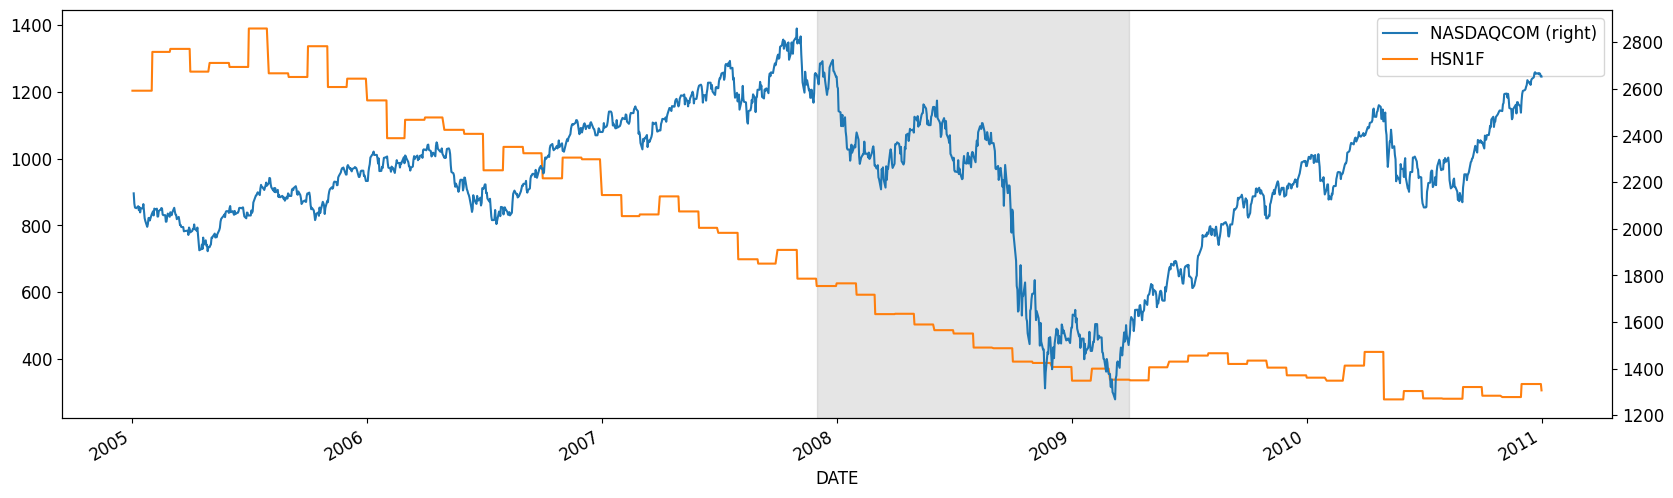

In [32]:
# 2008년 금융위기 당시 나스닥지수(NASDAQCOM)와 주택 판매 지수(Ticker찾기) 를 API로 불러와 시각화 해보세요 # HSN1F
# 2005~2011 까지 출력

# DataReader()를 사용해서 데이터를 불러오세요


#plot()를 사용하여 2번째 y축을 설정하세요


# 2008년 서브프라임 모기지 표시('2007-12-01', '2009-03-30'). Hint : ax.axvspan



In [33]:
df.tail()

,NASDAQCOM,HSN1F
DATE,,
2010-12-28,2662.88,326.0
2010-12-29,2666.93,326.0
2010-12-30,2662.98,326.0
2010-12-31,2652.87,326.0
2011-01-01,2652.87,307.0


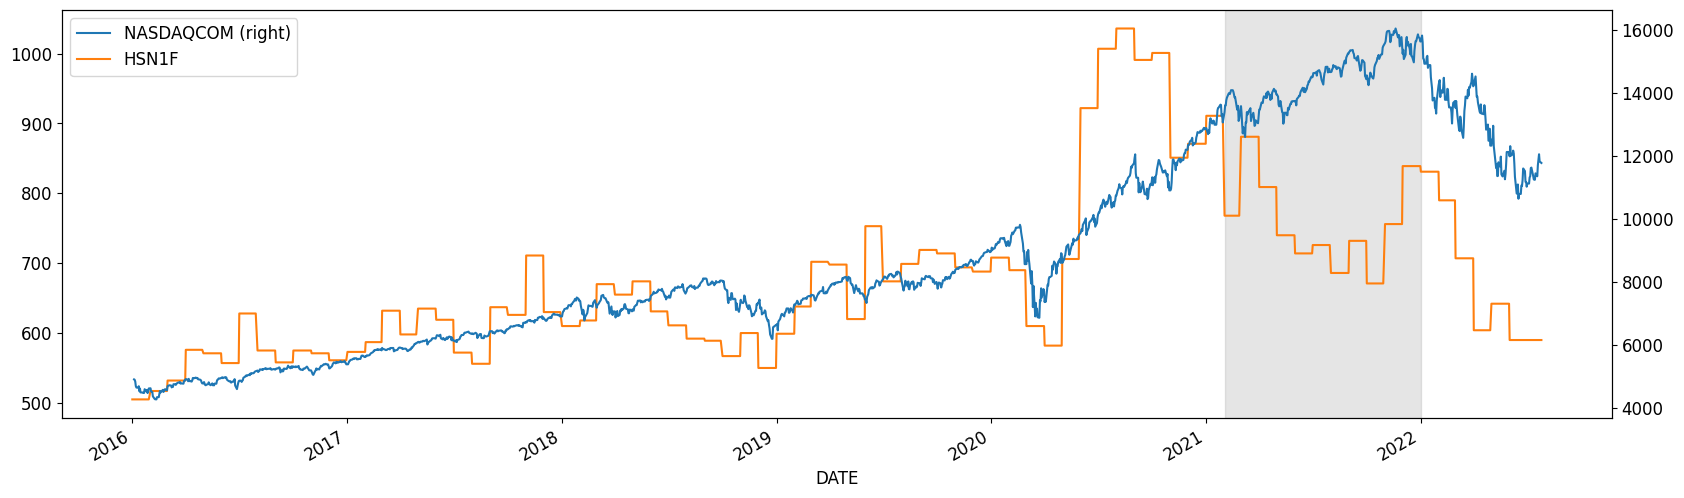

In [34]:
# 2022년 1월 현재 주택판매지수와 나스닥 지수와의 관계 
# 2016년부터 출력

# DataReader()를 사용해서 데이터를 불러오세요


#plot()를 사용하여 2번째 y축을 설정하세요


# 최근 추세를 살펴보기 위해 음영 표시합니다.(완료)
ax = ax.axvspan('2021-02-01', '2022-01-01', color='gray', alpha=0.2)

In [ ]:
# 불황으로 주가가 하락할 때 하락에 앞서 주택 판매 지수가 하락하는 모습을 보입니다.

# 실제 부동산 매물이 팔리는 데 걸리는 기간(뉴스기사 인용)

<center><img src="./data/USA.jpg" width="300" height="100"></center>

# 4. Macro 지표와 주택가격지수

지금까지 공부한 S&P500 지수, 케이스&쉴러지수, 미국기준금리, 미국주택가격지수, M2 통화량에 대한 상관관계를 한번에 계산

In [16]:
df_allinone = fdr.DataReader(['CSUSHPISA', 'WM2NS', 'USSTHPI','INTDSRUSM193N', 'SP500', 'ICSA', 'HSN1F'], start = '2014', data_source='fred')
df_allinone.corr(method='pearson', min_periods=1)


,SP500,CSUSHPISA,INTDSRUSM193N,HSN1F,USSTHPI,WM2NS,ICSA
SP500,1.000000,0.942802,-0.283248,0.684967,0.935561,0.964827,0.071514
CSUSHPISA,0.942802,1.000000,-0.316811,0.556606,0.997247,0.971791,0.068896
INTDSRUSM193N,-0.283248,-0.316811,1.000000,-0.112807,-0.287668,-0.412667,-0.288374
HSN1F,0.684967,0.556606,-0.112807,1.000000,0.563755,0.681247,0.230815
USSTHPI,0.935561,0.997247,-0.287668,0.563755,1.000000,0.966171,0.080338
WM2NS,0.964827,0.971791,-0.412667,0.681247,0.966171,1.000000,0.180832
ICSA,0.071514,0.068896,-0.288374,0.230815,0.080338,0.180832,1.000000


In [17]:
df_allinone

,SP500,CSUSHPISA,INTDSRUSM193N,HSN1F,USSTHPI,WM2NS,ICSA
DATE,,,,,,,
2014-01-01,NaN,161.944,0.75,443.0,331.70,NaN,NaN
2014-01-02,1831.98,161.944,0.75,443.0,331.70,NaN,NaN
2014-01-03,1831.37,161.944,0.75,443.0,331.70,NaN,NaN
2014-01-04,1831.37,161.944,0.75,443.0,331.70,NaN,322000.0
2014-01-06,1826.77,161.944,0.75,443.0,331.70,11179.0,322000.0
...,...,...,...,...,...,...,...
2022-10-24,3797.34,301.929,0.25,603.0,617.89,21409.7,217000.0
2022-10-25,3859.11,301.929,0.25,603.0,617.89,21409.7,217000.0
2022-10-26,3830.60,301.929,0.25,603.0,617.89,21409.7,217000.0


---

# 경제전문 신문기사 
* [한국경제TV 글로벌_뜨거운 미국 남가주 주택시장, 주택 매매가 최고가 갱신! 전망은?](https://m.kvina.co.kr/newsCenter/view.asp?articleId=A202107290198&pgCode=0303)

# 데이터 분석에 참고할 만한 괜찮은 블로그
파이썬 코드 공부에 괜찮은 블로그 입니다.

1. 그래프 그리기
https://codetorial.net/matplotlib/two_types_of_graphs.html

2. BBC 뉴스기사 분석
https://codetorial.net/beautifulsoup/crawling_ex03.html

# [3주차 과제] 부동산에 영향을 미치는 나만의 데이터 셋 만들기

인플래이션, 비트코인과 부동산은 관련이 있을까요? 뿐만 아니라 다양한 경제 지표를 통해 나만의 데이터 셋을 만들어보세요